In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
import os
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [3]:
os.chdir(r'C:\Users\Chandler\Desktop\FtechX')

In [6]:
# df = pd.read_csv('Santander/train_ver2.csv/train_ver2.csv',low_memory=False,header=None)

limit_rows   = 7000000
df           = pd.read_csv("Santander/train_ver2.csv/train_ver2.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str}, nrows=limit_rows)
unique_ids   = pd.Series(df["ncodpers"].unique())
limit_people = 1.2e4
unique_id    = unique_ids.sample(n=limit_people)
df           = df[df.ncodpers.isin(unique_id)]
df.describe()

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:2644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  locs = rs.choice(axis_length, size=n, replace=replace, p=weights)


,ncodpers,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,9.301200e+04,92622.000000,92622.0,92155.000000,92622.000000,7.603800e+04,93012.000000,93012.0,93012.000000,93012.000000,...,93012.000000,93012.000000,93012.000000,93012.000000,93012.000000,93012.000000,93012.000000,92781.000000,92781.000000,93012.000000
mean,7.977766e+05,1.130142,1.0,26.607281,0.485079,1.357216e+05,0.000215,0.0,0.699705,0.000419,...,0.008719,0.010784,0.002516,0.060691,0.050746,0.028921,0.003774,0.059355,0.064798,0.134789
std,4.219251e+05,3.568908,0.0,12.694017,0.499780,3.089848e+05,0.014662,0.0,0.458388,0.020473,...,0.092970,0.103283,0.050095,0.238764,0.219480,0.167585,0.061315,0.236289,0.246170,0.341500
min,1.593900e+04,1.000000,1.0,1.000000,0.000000,5.340930e+03,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.166560e+05,1.000000,1.0,15.000000,0.000000,6.914799e+04,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.018350e+05,1.000000,1.0,28.000000,0.000000,1.024260e+05,0.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.164126e+06,1.000000,1.0,34.000000,1.000000,1.558041e+05,0.000000,0.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.495457e+06,99.000000,1.0,52.000000,1.000000,2.203474e+07,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Clean the datetime issue
df["fecha_dato"] = pd.to_datetime(df["fecha_dato"],format="%Y-%m-%d")
df["fecha_alta"] = pd.to_datetime(df["fecha_alta"],format="%Y-%m-%d")
df["fecha_dato"].unique()

array(['2015-01-28T00:00:00.000000000', '2015-02-28T00:00:00.000000000',
       '2015-03-28T00:00:00.000000000', '2015-04-28T00:00:00.000000000',
       '2015-05-28T00:00:00.000000000', '2015-06-28T00:00:00.000000000',
       '2015-07-28T00:00:00.000000000', '2015-08-28T00:00:00.000000000',
       '2015-09-28T00:00:00.000000000', '2015-10-28T00:00:00.000000000'], dtype='datetime64[ns]')

In [10]:
# Check the missing value
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

TypeError: '<=' not supported between instances of 'str' and 'int'

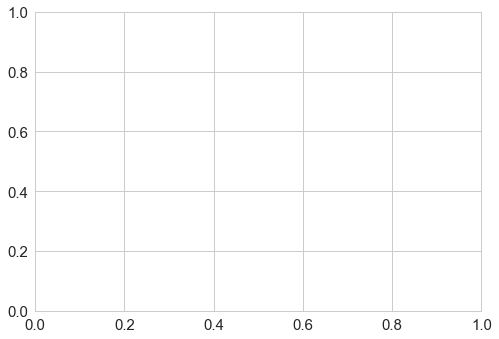

In [15]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="y")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")